In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel(r"C:\Users\parkh\OneDrive\Desktop\HateSpeech\HECM.xlsx")
data

,@renukapandit_ Just feel pura black hard tumhare ander navel tak push ho raha hai or tumhar hips per meri thighs ki takkar chap chap ko avaj kar rahi hai,Hateful
0,@ArvindKejriwal sir aap aise hi padhe likhe ga...,Hateful
1,@sonbhadrapolice @Mithile38597238 @narendramod...,Hateful
2,@SUMANTAinAAP Ye democracy hi hai jiski wajah ...,Hateful
3,जै अंबानी अडानी मरे किसान ........ नहीं चलेगा ...,Hateful
4,जै अंबानी अडानी मरे किसान ........ नहीं चलेगा ...,Hateful
...,...,...
8094,RT @Veeryad29866339: Modi ji please hum studen...,NaN
8095,@Khushter18 Bilkul sun kar anjaan ho rahi hai ...,NaN
8096,@AnumaVidisha Kanagna da Khasam tei yaar modi ...,NaN
8097,Ena solrathu sangi avaukuthan padika theriyath...,NaN


In [2]:
df = data .copy()

In [3]:
df.isnull().sum()

@renukapandit_ Just feel pura black hard tumhare ander navel tak push ho raha hai or tumhar hips per meri thighs ki takkar chap chap ko avaj kar rahi hai     0
Hateful                                                                                                                                                      31
dtype: int64

In [4]:
# Fill missing values in 'Hateful' with 0
df['Hateful'] = df['Hateful'].fillna(0)

# If you want to use a placeholder instead (e.g., "Unknown")
# df['Hateful'] = df['Hateful'].fillna("Unknown")


In [5]:
df.isnull().sum()

@renukapandit_ Just feel pura black hard tumhare ander navel tak push ho raha hai or tumhar hips per meri thighs ki takkar chap chap ko avaj kar rahi hai    0
Hateful                                                                                                                                                      0
dtype: int64

In [7]:
df.head()

,@renukapandit_ Just feel pura black hard tumhare ander navel tak push ho raha hai or tumhar hips per meri thighs ki takkar chap chap ko avaj kar rahi hai,Hateful
0,@ArvindKejriwal sir aap aise hi padhe likhe ga...,Hateful
1,@sonbhadrapolice @Mithile38597238 @narendramod...,Hateful
2,@SUMANTAinAAP Ye democracy hi hai jiski wajah ...,Hateful
3,जै अंबानी अडानी मरे किसान ........ नहीं चलेगा ...,Hateful
4,जै अंबानी अडानी मरे किसान ........ नहीं चलेगा ...,Hateful


In [13]:
# extract the text and labels
X = list(data['@renukapandit_ Just feel pura black hard tumhare ander navel tak push ho raha hai or tumhar hips per meri thighs ki takkar chap chap ko avaj kar rahi hai'])
y = list(data['Hateful'])

In [10]:
unique_labels = df['Hateful'].unique()
label_dict = {label: i for i, label in enumerate(unique_labels)}
num_labels = len(unique_labels)
print("Label mapping:", label_dict)


Label mapping: {'Hateful': 0, 'Non-Hateful': 1, 0: 2}


In [6]:
import re
def clean_text(text):
    if pd.isnull(text):  # Check for NaN values
        return ''
    
    # Remove newlines
    text = re.sub(r'\n+', ' ', text)
    
    # Remove URLs (http, https, or www links)
    text = re.sub(r'http\S+|www\S+|t\.co\S+', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply the cleaning function to the 'cleaned_text' column
df['preprocessed_text'] = df['@renukapandit_ Just feel pura black hard tumhare ander navel tak push ho raha hai or tumhar hips per meri thighs ki takkar chap chap ko avaj kar rahi hai'].apply(clean_text)

In [7]:
df['preprocessed_text']

0       @ArvindKejriwal sir aap aise hi padhe likhe ga...
1       @sonbhadrapolice @Mithile38597238 @narendramod...
2       @SUMANTAinAAP Ye democracy hi hai jiski wajah ...
3       जै अंबानी अडानी मरे किसान ........ नहीं चलेगा ...
4       जै अंबानी अडानी मरे किसान ........ नहीं चलेगा ...
                              ...                        
8094    RT @Veeryad29866339: Modi ji please hum studen...
8095    @Khushter18 Bilkul sun kar anjaan ho rahi hai ...
8096    @AnumaVidisha Kanagna da Khasam tei yaar modi ...
8097    Ena solrathu sangi avaukuthan padika theriyath...
8098    @Agamudaiyar_ Aana intha aalu Modi kaaluke viz...
Name: preprocessed_text, Length: 8099, dtype: object

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sb
import warnings
from nltk.corpus import stopwords

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import Binarizer


from collections import Counter
from os import listdir, makedirs
from os.path import isfile, join, splitext, split

In [10]:
from wordcloud import STOPWORDS, WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.naive_bayes import GaussianNB

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, naive_bayes, svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier 

warnings.filterwarnings('ignore')
np.random.seed(0)

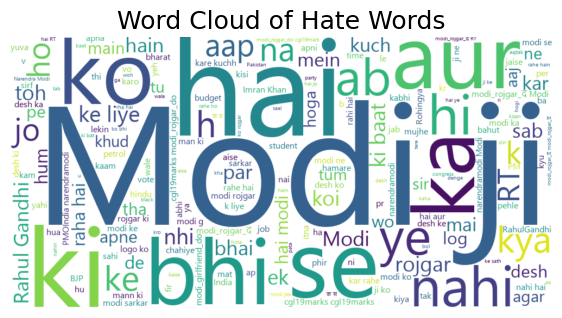

In [23]:
# Define stopwords
english_stopwords = set(stopwords.words('english'))

# Combine all text from the preprocessed column
text = ' '.join(df['preprocessed_text'].astype(str))

# Use Mangal or Nirmala UI, which support Hindi text
font_path = fm.findSystemFonts(fontpaths=None, fontext='ttf')
hindi_font = None
for font in font_path:
    if 'Mangal' in font or 'Nirmala' in font:
        hindi_font = font
        break

# Generate and display the word cloud
if hindi_font:
    wordcloud = WordCloud(
        width=1000, 
        height=500, 
        background_color='white',
        font_path=hindi_font,
        stopwords=english_stopwords
    ).generate(text)

    plt.figure(figsize=(7, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of Hate Words", fontsize=18)
    plt.show()
else:
    print("No Hindi-compatible font found.")


In [26]:
example=df['@renukapandit_ Just feel pura black hard tumhare ander navel tak push ho raha hai or tumhar hips per meri thighs ki takkar chap chap ko avaj kar rahi hai'][233]
example

'Gov revoked the SC stay once But ye Jai bhim aur Jai Seva vote chodo bhav tak nahi dete aur Bina mange hi Gov ne revoked kar diya ye act war re sarkar Aur sala hum vote dete tumko to hum chutiya ch hue phir . Sala agli bar nota ko dunga . https://t.co/ovNhMfXC8q #BAN_SCST_ACT'

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 32)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from time import time
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': MultinomialNB()
}

results = {}

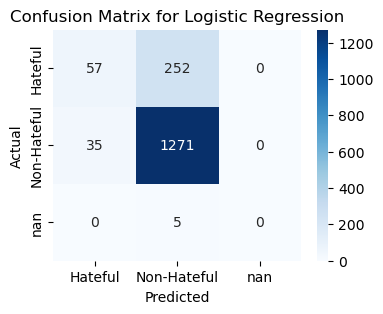

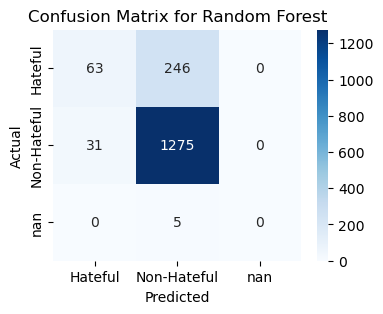

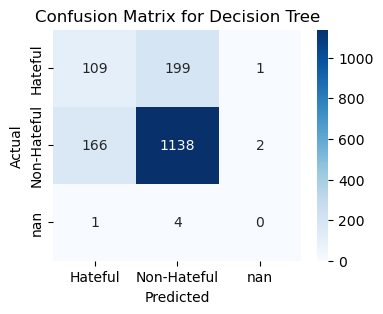

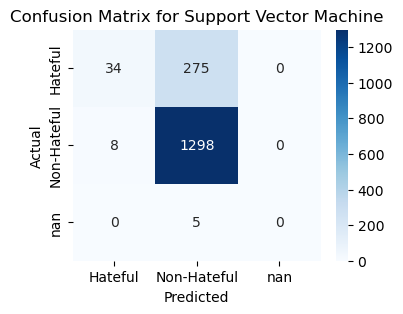

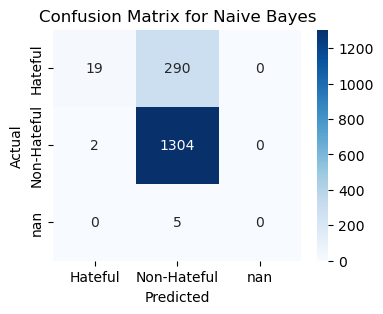

Results for Logistic Regression:
Accuracy: 0.8197530864197531
F1 Score: 0.7773347067436004
Precision: 0.7887559613638983
Recall: 0.8197530864197531
Time Taken: 0.6313900947570801


Results for Random Forest:
Accuracy: 0.825925925925926
F1 Score: 0.7855332170782326
Precision: 0.8014085507107175
Recall: 0.825925925925926
Time Taken: 11.889887809753418


Results for Decision Tree:
Accuracy: 0.769753086419753
F1 Score: 0.7642601818994381
Precision: 0.7594635145417874
Recall: 0.769753086419753
Time Taken: 2.9716508388519287


Results for Support Vector Machine:
Accuracy: 0.8222222222222222
F1 Score: 0.7626199908472472
Precision: 0.8175348654224868
Recall: 0.8222222222222222
Time Taken: 7.06134557723999


Results for Naive Bayes:
Accuracy: 0.8166666666666667
F1 Score: 0.7457158117800688
Precision: 0.8300167212091333
Recall: 0.8166666666666667
Time Taken: 0.06531095504760742




In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from time import time

# Dictionary to store results
results = {}

# Iterate over each model
for model_name, model in models.items():
    start_time = time()
    
    # Train the model
    model.fit(X_train_tfidf, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_tfidf)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    time_taken = time() - start_time
    
    # Save results
    results[model_name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall,
        'Confusion Matrix': conf_matrix,
        'Time Taken': time_taken
    }
    
    # Plot confusion matrix as heatmap
    plt.figure(figsize=(4,3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Print results
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    for metric_name, value in metrics.items():
        if metric_name != 'Confusion Matrix':
            print(f"{metric_name}: {value}")
    print("\n")


In [17]:
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"Time Taken: {metrics['Time Taken']:.4f} seconds")



Model: Logistic Regression
Accuracy: 0.8198
F1 Score: 0.7773
Confusion Matrix:
[[  57  252    0]
 [  35 1271    0]
 [   0    5    0]]
Time Taken: 0.6314 seconds

Model: Random Forest
Accuracy: 0.8259
F1 Score: 0.7855
Confusion Matrix:
[[  63  246    0]
 [  31 1275    0]
 [   0    5    0]]
Time Taken: 11.8899 seconds

Model: Decision Tree
Accuracy: 0.7698
F1 Score: 0.7643
Confusion Matrix:
[[ 109  199    1]
 [ 166 1138    2]
 [   1    4    0]]
Time Taken: 2.9717 seconds

Model: Support Vector Machine
Accuracy: 0.8222
F1 Score: 0.7626
Confusion Matrix:
[[  34  275    0]
 [   8 1298    0]
 [   0    5    0]]
Time Taken: 7.0613 seconds

Model: Naive Bayes
Accuracy: 0.8167
F1 Score: 0.7457
Confusion Matrix:
[[  19  290    0]
 [   2 1304    0]
 [   0    5    0]]
Time Taken: 0.0653 seconds


In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenization
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Encode the target labels (convert to string first)
encoder = LabelEncoder()
df['Hateful'] = encoder.fit_transform(df['Hateful'].astype(str))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    df['preprocessed_text'], df['Hateful'], test_size=0.2, random_state=42
)

# Tokenization parameters
max_words = 10000  # Vocabulary size
max_len = 150      # Max sequence length

# Tokenizer
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences and pad them
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Labels as arrays
y_train = y_train.values
y_test = y_test.values


In [20]:
# Tokenization
max_words = 10000  # Maximum vocabulary size
max_len = 150      # Maximum sequence length

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')

# Fit the tokenizer on training text
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input size
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# Ensure all data is in NumPy format
X_train_padded = np.array(X_train_padded)
X_test_padded = np.array(X_test_padded)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Print the shapes for verification
print("X_train shape:", X_train_padded.shape)
print("X_test shape:", X_test_padded.shape)


X_train shape: (6479, 150)
X_test shape: (1620, 150)


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# CNN Model
cnn_model = Sequential()

# Embedding layer
cnn_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))

# CNN layers
cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())

# Fully connected layers
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [22]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform labels to numeric values
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)  # Use transform (not fit_transform) to keep consistency

# Convert to float32 (or int32) for model compatibility
y_train = np.array(y_train).astype('float32')
y_test = np.array(y_test).astype('float32')


In [23]:
# Train the model using the padded sequences
cnn_history = cnn_model.fit(
    X_train_padded, y_train,
    epochs=10, batch_size=32,
    validation_data=(X_test_padded, y_test)
)


Epoch 1/10
203/203 [==============================] - 9s 41ms/step - loss: -6122.3145 - accuracy: 0.1861 - val_loss: -36324.5078 - val_accuracy: 0.1969
Epoch 2/10
203/203 [==============================] - 9s 45ms/step - loss: -295210.1875 - accuracy: 0.1875 - val_loss: -837662.5000 - val_accuracy: 0.1969
Epoch 3/10
203/203 [==============================] - 7s 34ms/step - loss: -2336714.5000 - accuracy: 0.1875 - val_loss: -4689181.5000 - val_accuracy: 0.1969
Epoch 4/10
203/203 [==============================] - 7s 34ms/step - loss: -9036408.0000 - accuracy: 0.1875 - val_loss: -15033775.0000 - val_accuracy: 0.1969
Epoch 5/10
203/203 [==============================] - 8s 38ms/step - loss: -24356864.0000 - accuracy: 0.1875 - val_loss: -36167020.0000 - val_accuracy: 0.1969
Epoch 6/10
203/203 [==============================] - 7s 36ms/step - loss: -52392448.0000 - accuracy: 0.1875 - val_loss: -72498768.0000 - val_accuracy: 0.1969
Epoch 7/10
203/203 [==============================] - 7s 36m

In [40]:
# Evaluate the CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_padded, y_test)
print(f"CNN Accuracy: {cnn_accuracy * 100:.2f}%")


51/51 [==============================] - 1s 11ms/step - loss: -622959296.0000 - accuracy: 0.1969
CNN Accuracy: 19.69%


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# LSTM Model
lstm_model = Sequential()

# Embedding layer
lstm_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))

# LSTM layer
lstm_model.add(LSTM(128, return_sequences=False))

# Fully connected layers
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
lstm_history = lstm_model.fit(
    X_train_padded, y_train,
    epochs=10, batch_size=32,
    validation_data=(X_test_padded, y_test)
)


Epoch 1/10
203/203 [==============================] - 25s 113ms/step - loss: -89.0858 - accuracy: 0.1869 - val_loss: -236.0093 - val_accuracy: 0.1969
Epoch 2/10
203/203 [==============================] - 20s 98ms/step - loss: -510.8068 - accuracy: 0.1875 - val_loss: -848.7140 - val_accuracy: 0.1969
Epoch 3/10
203/203 [==============================] - 21s 102ms/step - loss: -1332.6373 - accuracy: 0.1875 - val_loss: -1849.2606 - val_accuracy: 0.1969
Epoch 4/10
203/203 [==============================] - 22s 111ms/step - loss: -2514.2576 - accuracy: 0.1875 - val_loss: -3200.8743 - val_accuracy: 0.1969
Epoch 5/10
203/203 [==============================] - 23s 113ms/step - loss: -4033.5542 - accuracy: 0.1875 - val_loss: -4888.4224 - val_accuracy: 0.1969
Epoch 6/10
203/203 [==============================] - 21s 104ms/step - loss: -5880.2188 - accuracy: 0.1875 - val_loss: -6890.2246 - val_accuracy: 0.1969
Epoch 7/10
203/203 [==============================] - 22s 106ms/step - loss: -8081.7651 

In [44]:
from tensorflow.keras.layers import Bidirectional

# Bi-LSTM Model
bi_lstm_model = Sequential()

# Embedding layer
bi_lstm_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))

# Bidirectional LSTM layer
bi_lstm_model.add(Bidirectional(LSTM(128, return_sequences=False)))

# Fully connected layers
bi_lstm_model.add(Dense(64, activation='relu'))
bi_lstm_model.add(Dropout(0.5))
bi_lstm_model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
bi_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Bi-LSTM model
bi_lstm_history = bi_lstm_model.fit(
    X_train_padded, y_train,
    epochs=10, batch_size=32,
    validation_data=(X_test_padded, y_test)
)


Epoch 1/10
203/203 [==============================] - 84s 343ms/step - loss: -197.9636 - accuracy: 0.1868 - val_loss: -544.3572 - val_accuracy: 0.1969
Epoch 2/10
203/203 [==============================] - 66s 328ms/step - loss: -1212.4829 - accuracy: 0.1875 - val_loss: -2023.9355 - val_accuracy: 0.1969
Epoch 3/10
203/203 [==============================] - 69s 337ms/step - loss: -3173.8906 - accuracy: 0.1875 - val_loss: -4427.8813 - val_accuracy: 0.1969
Epoch 4/10
203/203 [==============================] - 74s 364ms/step - loss: -6048.5166 - accuracy: 0.1875 - val_loss: -7703.2944 - val_accuracy: 0.1969
Epoch 5/10
203/203 [==============================] - 69s 338ms/step - loss: -9729.9209 - accuracy: 0.1875 - val_loss: -11784.1318 - val_accuracy: 0.1969
Epoch 6/10
203/203 [==============================] - 67s 331ms/step - loss: -14305.2988 - accuracy: 0.1875 - val_loss: -16637.8867 - val_accuracy: 0.1969
Epoch 7/10
203/203 [==============================] - 49s 242ms/step - loss: -195

In [43]:
# Evaluate the CNN model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_padded, y_test)
print(f"LSTM Accuracy: {lstm_accuracy * 100:.2f}%")


51/51 [==============================] - 4s 80ms/step - loss: -28029.4199 - accuracy: 0.1969
LSTM Accuracy: 19.69%


In [45]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Concatenate, Dense, Dropout

# Input
input_layer = Input(shape=(max_len,))

# Shared Embedding layer
embedding = Embedding(input_dim=max_words, output_dim=128, input_length=max_len)(input_layer)

# LSTM Branch
lstm = LSTM(64, return_sequences=True)(embedding)
lstm_pool = GlobalMaxPooling1D()(lstm)

# CNN Branch
conv = Conv1D(64, kernel_size=3, activation='relu')(embedding)
conv_pool = GlobalMaxPooling1D()(conv)

# Merge both
merged = Concatenate()([lstm_pool, conv_pool])
merged = Dropout(0.5)(merged)
output = Dense(1, activation='sigmoid')(merged)

# Final model
model = Model(inputs=input_layer, outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150)]                0         []                            
                                                                                                  
 embedding_3 (Embedding)     (None, 150, 128)             1280000   ['input_1[0][0]']             
                                                                                                  
 lstm_2 (LSTM)               (None, 150, 64)              49408     ['embedding_3[0][0]']         
                                                                                                  
 conv1d_1 (Conv1D)           (None, 148, 64)              24640     ['embedding_3[0][0]']         
                                                                                              

In [46]:
history = model.fit(
    X_train_pad, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_test_pad, y_test)
)


Epoch 1/5
203/203 [==============================] - 37s 150ms/step - loss: -123.7893 - accuracy: 0.1874 - val_loss: -537.5457 - val_accuracy: 0.1969
Epoch 2/5
203/203 [==============================] - 26s 129ms/step - loss: -2371.6191 - accuracy: 0.1875 - val_loss: -5287.7368 - val_accuracy: 0.1969
Epoch 3/5
203/203 [==============================] - 17s 84ms/step - loss: -11274.8398 - accuracy: 0.1875 - val_loss: -18973.4375 - val_accuracy: 0.1969
Epoch 4/5
203/203 [==============================] - 16s 79ms/step - loss: -31379.4570 - accuracy: 0.1875 - val_loss: -45437.1562 - val_accuracy: 0.1969
Epoch 5/5
203/203 [==============================] - 16s 78ms/step - loss: -65643.1719 - accuracy: 0.1875 - val_loss: -87177.7109 - val_accuracy: 0.1969


In [47]:
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_acc * 100:.2f}%")
print(f"Final Validation Accuracy: {final_val_acc * 100:.2f}%")

Final Training Accuracy: 18.75%
Final Validation Accuracy: 19.69%


In [48]:
from tensorflow.keras.layers import Bidirectional

# Bi-LSTM Model
bi_lstm_model = Sequential()

# Embedding layer
bi_lstm_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))

# Bidirectional LSTM layer
bi_lstm_model.add(Bidirectional(LSTM(128, return_sequences=False)))

# Fully connected layers
bi_lstm_model.add(Dense(64, activation='relu'))
bi_lstm_model.add(Dropout(0.5))
bi_lstm_model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
bi_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Bi-LSTM model
bi_lstm_history = bi_lstm_model.fit(
    X_train_padded, y_train,
    epochs=10, batch_size=32,
    validation_data=(X_test_padded, y_test)
)


Epoch 1/10
203/203 [==============================] - 132s 447ms/step - loss: -253.8870 - accuracy: 0.1871 - val_loss: -691.3716 - val_accuracy: 0.1969
Epoch 2/10
203/203 [==============================] - 66s 326ms/step - loss: -1544.7183 - accuracy: 0.1875 - val_loss: -2562.8684 - val_accuracy: 0.1969
Epoch 3/10
203/203 [==============================] - 67s 330ms/step - loss: -4004.2424 - accuracy: 0.1875 - val_loss: -5580.7632 - val_accuracy: 0.1969
Epoch 4/10
203/203 [==============================] - 56s 278ms/step - loss: -7629.2681 - accuracy: 0.1875 - val_loss: -9705.1689 - val_accuracy: 0.1969
Epoch 5/10
203/203 [==============================] - 64s 314ms/step - loss: -12356.8721 - accuracy: 0.1875 - val_loss: -14868.8271 - val_accuracy: 0.1969
Epoch 6/10
203/203 [==============================] - 64s 315ms/step - loss: -17956.6777 - accuracy: 0.1875 - val_loss: -20948.3750 - val_accuracy: 0.1969
Epoch 7/10
203/203 [==============================] - 60s 292ms/step - loss: -2

In [49]:
from sklearn.metrics import accuracy_score
import numpy as np

# Predict probabilities from each model
lstm_preds = lstm_model.predict(X_test_pad)
bi_lstm_preds = bi_lstm_model.predict(X_test_pad)
cnn_preds = cnn_model.predict(X_test_pad)

# Average predictions
avg_preds = (lstm_preds + bi_lstm_preds + cnn_preds) / 3
final_preds = np.round(avg_preds).astype(int)

# Evaluate
print("Ensemble Accuracy:", accuracy_score(y_test, final_preds))


51/51 [==============================] - 1s 11ms/step
Ensemble Accuracy: 0.19691358024691358


In [31]:
df.columns

Index(['@renukapandit_ Just feel pura black hard tumhare ander navel tak push ho raha hai or tumhar hips per meri thighs ki takkar chap chap ko avaj kar rahi hai',
       'Hateful', 'preprocessed_text'],
      dtype='object')

In [32]:
import pandas as pd

# Assign proper column names
df.columns = ['Post', 'Label', 'preprocessed_text']


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, concatenate, Dense, Dropout
from tensorflow.keras.utils import to_categorical


# 2. Encode string labels to integers
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

# 3. Prepare text and labels
texts = df['Post'].astype(str).values
num_classes = len(label_encoder.classes_)
labels = to_categorical(df['Label'].values, num_classes=num_classes)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# 5. Tokenization and Padding
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# 6. Build Hybrid CNN + LSTM model
input_layer = Input(shape=(max_len,))
embedding_layer = Embedding(input_dim=max_words, output_dim=128, input_length=max_len)(input_layer)

cnn_layer = Conv1D(64, 5, activation='relu')(embedding_layer)
cnn_layer = GlobalMaxPooling1D()(cnn_layer)

lstm_layer = LSTM(64)(embedding_layer)

merged = concatenate([cnn_layer, lstm_layer])
dense = Dense(64, activation='relu')(merged)
dropout = Dropout(0.5)(dense)
output = Dense(num_classes, activation='softmax')(dropout)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 7. Train the model
history = model.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_pad, y_test)
)


Epoch 1/10
203/203 [==============================] - 14s 58ms/step - loss: 0.5435 - accuracy: 0.8061 - val_loss: 0.4945 - val_accuracy: 0.7994
Epoch 2/10
203/203 [==============================] - 11s 55ms/step - loss: 0.3923 - accuracy: 0.8404 - val_loss: 0.4637 - val_accuracy: 0.8037
Epoch 3/10
203/203 [==============================] - 11s 55ms/step - loss: 0.1864 - accuracy: 0.9407 - val_loss: 0.6180 - val_accuracy: 0.8093
Epoch 4/10
203/203 [==============================] - 11s 55ms/step - loss: 0.0899 - accuracy: 0.9761 - val_loss: 0.7065 - val_accuracy: 0.8000
Epoch 5/10
203/203 [==============================] - 11s 55ms/step - loss: 0.0670 - accuracy: 0.9824 - val_loss: 0.7984 - val_accuracy: 0.8062
Epoch 6/10
203/203 [==============================] - 11s 55ms/step - loss: 0.0488 - accuracy: 0.9870 - val_loss: 0.9359 - val_accuracy: 0.8117
Epoch 7/10
203/203 [==============================] - 11s 55ms/step - loss: 0.0414 - accuracy: 0.9875 - val_loss: 0.9570 - val_accuracy:

In [35]:
from sklearn.metrics import accuracy_score
import numpy as np

# Predict probabilities
y_pred_probs = model.predict(X_test_pad)

# Convert one-hot predictions and labels back to class indices
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate accuracy
acc = accuracy_score(y_true, y_pred)
print("Test Accuracy:", acc)


51/51 [==============================] - 1s 14ms/step
Test Accuracy: 0.7858024691358024


In [36]:
loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=1)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


51/51 [==============================] - 1s 14ms/step - loss: 1.0016 - accuracy: 0.7858
Test Accuracy: 78.58%
